In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('NHIS_Vision_and_Eye_Health_Surveillance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71649 entries, 0 to 71648
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   71649 non-null  int64  
 1   YearEnd                     71649 non-null  int64  
 2   LocationAbbr                71649 non-null  object 
 3   LocationDesc                71649 non-null  object 
 4   DataSource                  71649 non-null  object 
 5   Topic                       71649 non-null  object 
 6   Category                    71649 non-null  object 
 7   Question                    71649 non-null  object 
 8   Response                    71649 non-null  object 
 9   Age                         71649 non-null  object 
 10  Gender                      71649 non-null  object 
 11  RaceEthnicity               71649 non-null  object 
 12  RiskFactor                  71649 non-null  object 
 13  RiskFactorResponse          716

In [4]:
data.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,65-84 years,...,QCATS,RYES,NaN,AGE6584,GF,ASN,RFDM,RFBD,NaN,NaN
1,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,85 years and older,...,QCATS,RYES,NaN,AGE85PLUS,GM,OTH,RFDM,RFNO,NaN,NaN
2,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Refused,40-64 years,...,ISPROT,RRF,NaN,AGE4064,GALL,OTH,RFDM,RFYES,NaN,NaN


In [5]:
mask_supressed = data['Data_Value_Footnote_Symbol'] == '#'
data = data[~mask_supressed]

In [6]:
#removing the data of all ages and 18 older
mask_all_ages = data['Age'] == 'All ages'
data = data[~mask_all_ages]
mask_18_and_older = data['Age'] == '18 years and older'
data = data[~mask_18_and_older]

In [7]:
data.reset_index(drop = True, inplace = True)
print(data.shape)
data.info()

(23263, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23263 entries, 0 to 23262
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   23263 non-null  int64  
 1   YearEnd                     23263 non-null  int64  
 2   LocationAbbr                23263 non-null  object 
 3   LocationDesc                23263 non-null  object 
 4   DataSource                  23263 non-null  object 
 5   Topic                       23263 non-null  object 
 6   Category                    23263 non-null  object 
 7   Question                    23263 non-null  object 
 8   Response                    23263 non-null  object 
 9   Age                         23263 non-null  object 
 10  Gender                      23263 non-null  object 
 11  RaceEthnicity               23263 non-null  object 
 12  RiskFactor                  23263 non-null  object 
 13  RiskFactorResponse 

In [8]:
data.drop(columns = ['Numerator', 'DataValueTypeID', 'GeoLocation', \
                     'Geographic Level', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], inplace = True)

In [9]:
data.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,LocationID,TopicID,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID
0,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Some of the time,18-39 years,...,59,TUTL,CPROT,ISPROT,RSOMT,AGE1839,GM,ASN,RFDM,RFNO
1,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Always,18-39 years,...,59,TUTL,CPROT,ISPROT,RALW,AGE1839,GM,ASN,RFDM,RFNO
2,2016,2017,US,National,NHIS,Visual Function,Blind or Difficulty Seeing,Percentage of adults who are blind or unable t...,Yes,85 years and older,...,59,TVFUNC,CBLIND,ISBLA,RYES,AGE85PLUS,GF,ALLRACE,RFHT,RFYES


In [10]:
visual_function_data = data.loc[data['Topic'] == "Visual Function"]
eye_health_condition_data = data.loc[data['Topic'] == "Eye Health Conditions"]
service_utilization_data = data.loc[data['Topic'] == "Service Utilization"]

### Exploratory Data Analysis

### Visual Function

In [11]:
visual_function_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18377 entries, 2 to 23262
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              18377 non-null  int64  
 1   YearEnd                18377 non-null  int64  
 2   LocationAbbr           18377 non-null  object 
 3   LocationDesc           18377 non-null  object 
 4   DataSource             18377 non-null  object 
 5   Topic                  18377 non-null  object 
 6   Category               18377 non-null  object 
 7   Question               18377 non-null  object 
 8   Response               18377 non-null  object 
 9   Age                    18377 non-null  object 
 10  Gender                 18377 non-null  object 
 11  RaceEthnicity          18377 non-null  object 
 12  RiskFactor             18377 non-null  object 
 13  RiskFactorResponse     18377 non-null  object 
 14  Data_Value_Unit        18377 non-null  object 
 15  Da

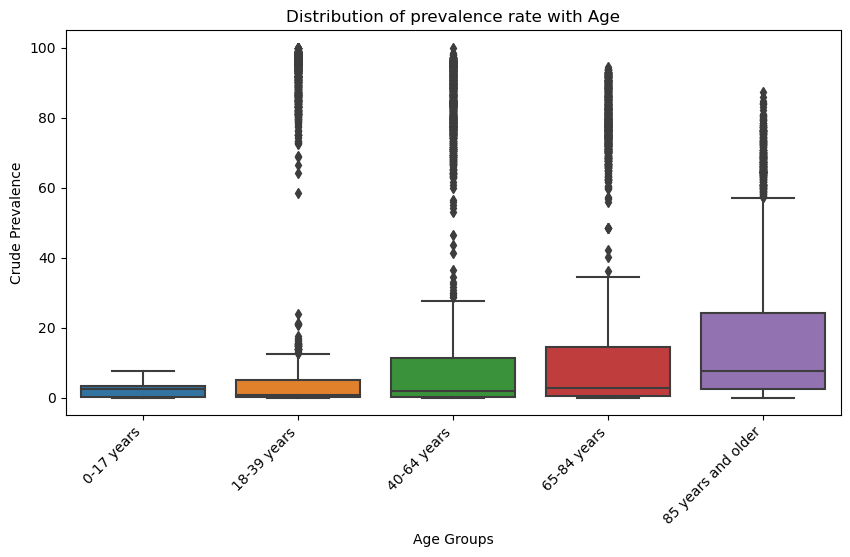

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = visual_function_data.sort_values(by = "Age"), x = "Age", y = "Data_Value", ax=ax)
plt.title('Distribution of prevalence rate with Age')
plt.xlabel('Age Groups')
plt.ylabel('Crude Prevalence')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

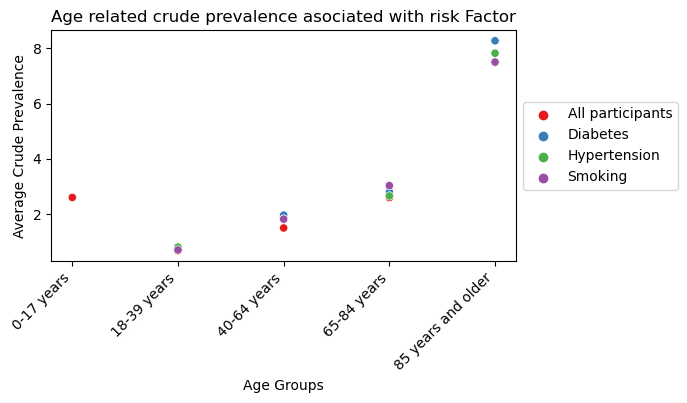

In [13]:
age_risk_prevalence = visual_function_data[['Age', 'RiskFactor', 'Data_Value']]\
                    .groupby(['Age', 'RiskFactor'])['Data_Value'].quantile([.5]).reset_index()
plt.figure(figsize=(6,3))
sns.scatterplot(data=age_risk_prevalence, x = 'Age', y = 'Data_Value', hue = 'RiskFactor', palette = 'Set1')
plt.xlabel('Age Groups')
plt.ylabel('Average Crude Prevalence')
plt.title('Age related crude prevalence asociated with risk Factor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

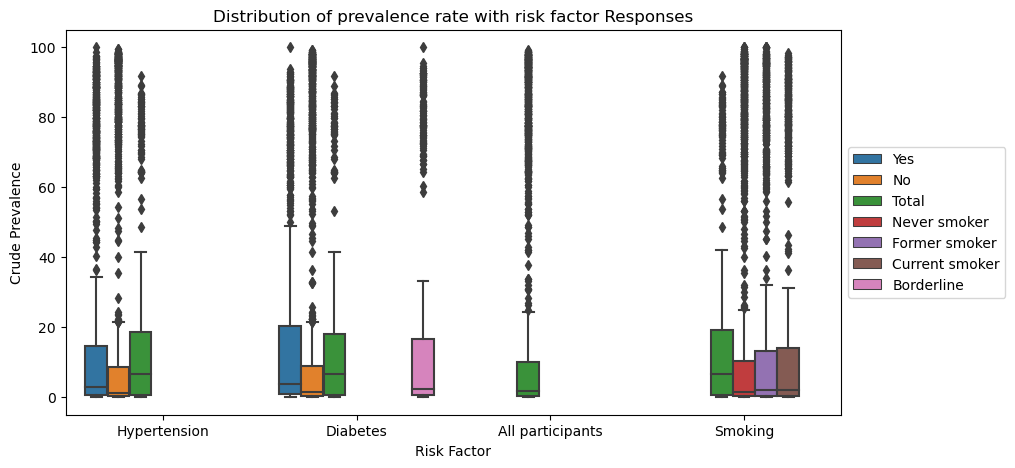

In [14]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = visual_function_data, x = "RiskFactor", y="Data_Value", hue = "RiskFactorResponse", ax = ax)
plt.title('Distribution of prevalence rate with risk factor Responses')
plt.xlabel('Risk Factor')
plt.ylabel('Crude Prevalence')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

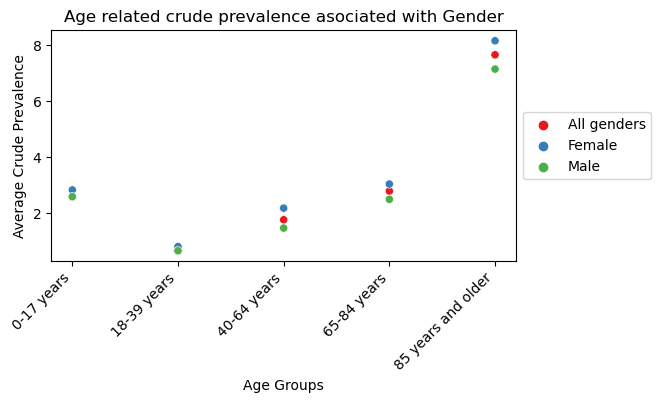

In [15]:
%matplotlib inline
age_gender_prevalence = visual_function_data[['Age', 'Gender', 'Data_Value']]\
                    .groupby(['Age', 'Gender'])['Data_Value'].quantile([.5]).reset_index()

plt.figure(figsize=(6,3))
sns.scatterplot(data = age_gender_prevalence, x = 'Age', y = 'Data_Value', hue = 'Gender', palette = 'Set1')
plt.xlabel('Age Groups')
plt.ylabel('Average Crude Prevalence')
plt.title('Age related crude prevalence asociated with Gender')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

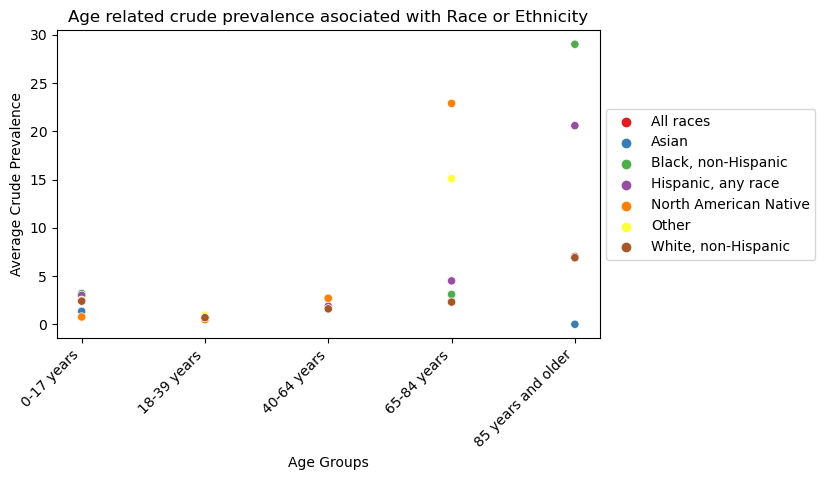

In [16]:
%matplotlib inline
age_race_prevalence = visual_function_data[['Age', 'RaceEthnicity', 'Data_Value']]\
                    .groupby(['Age', 'RaceEthnicity'])['Data_Value'].quantile([.5]).reset_index()
plt.figure(figsize=(7,4))
sns.scatterplot(data = age_race_prevalence, x = 'Age', y = 'Data_Value', hue = 'RaceEthnicity', palette = 'Set1')
plt.xlabel('Age Groups')
plt.ylabel('Average Crude Prevalence')
plt.title('Age related crude prevalence asociated with Race or Ethnicity')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Self Reported Eye Health Conditions

In [17]:
eye_health_condition_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 4194 to 7941
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              1448 non-null   int64  
 1   YearEnd                1448 non-null   int64  
 2   LocationAbbr           1448 non-null   object 
 3   LocationDesc           1448 non-null   object 
 4   DataSource             1448 non-null   object 
 5   Topic                  1448 non-null   object 
 6   Category               1448 non-null   object 
 7   Question               1448 non-null   object 
 8   Response               1448 non-null   object 
 9   Age                    1448 non-null   object 
 10  Gender                 1448 non-null   object 
 11  RaceEthnicity          1448 non-null   object 
 12  RiskFactor             1448 non-null   object 
 13  RiskFactorResponse     1448 non-null   object 
 14  Data_Value_Unit        1448 non-null   object 
 15  D

In [18]:
eye_health_condition_data[[ 'Category', 'CategoryID']].drop_duplicates().reset_index(drop = True)

,Category,CategoryID
0,Self-Report Cataract,CTCAT
1,Self-Report Diabetic Retinopathy,CTDR
2,Self-Report Age Related Macular Degeneration,CTAMD
3,Self-Report Glaucoma,CTGL


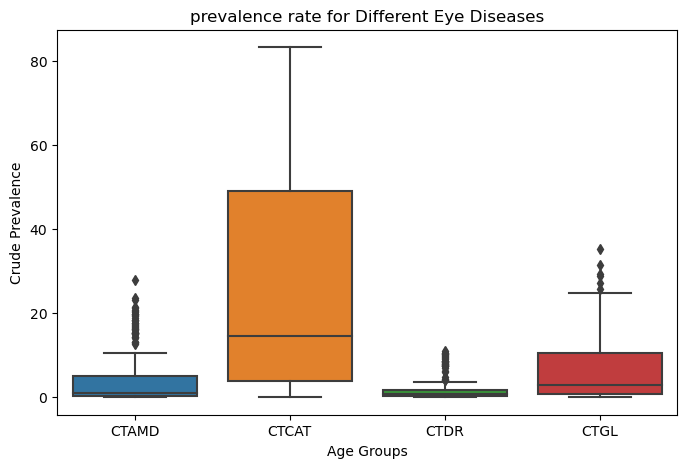

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data = eye_health_condition_data.sort_values(by = "CategoryID"), x = "CategoryID", y = "Data_Value", ax=ax)
plt.title('prevalence rate for Different Eye Diseases')
plt.xlabel('Age Groups')
plt.ylabel('Crude Prevalence')
plt.show()

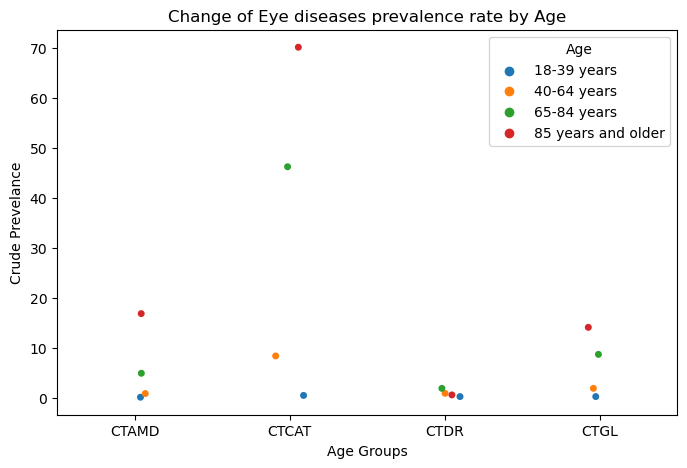

In [20]:
prevalence_Category_data = eye_health_condition_data[[ 'Age', 'CategoryID', 'Data_Value']]\
                    .groupby(['Age', 'CategoryID'])['Data_Value'].quantile([.5]).reset_index()
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(data = prevalence_Category_data, x = "CategoryID", y="Data_Value", hue = "Age", marker='o', ax = ax)
plt.title('Change of Eye diseases prevalence rate by Age')
plt.xlabel('Age Groups')
plt.ylabel('Crude Prevelance')
plt.show()

### Service Utilization

In [21]:
service_utilization_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 11417
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              3438 non-null   int64  
 1   YearEnd                3438 non-null   int64  
 2   LocationAbbr           3438 non-null   object 
 3   LocationDesc           3438 non-null   object 
 4   DataSource             3438 non-null   object 
 5   Topic                  3438 non-null   object 
 6   Category               3438 non-null   object 
 7   Question               3438 non-null   object 
 8   Response               3438 non-null   object 
 9   Age                    3438 non-null   object 
 10  Gender                 3438 non-null   object 
 11  RaceEthnicity          3438 non-null   object 
 12  RiskFactor             3438 non-null   object 
 13  RiskFactorResponse     3438 non-null   object 
 14  Data_Value_Unit        3438 non-null   object 
 15  Dat

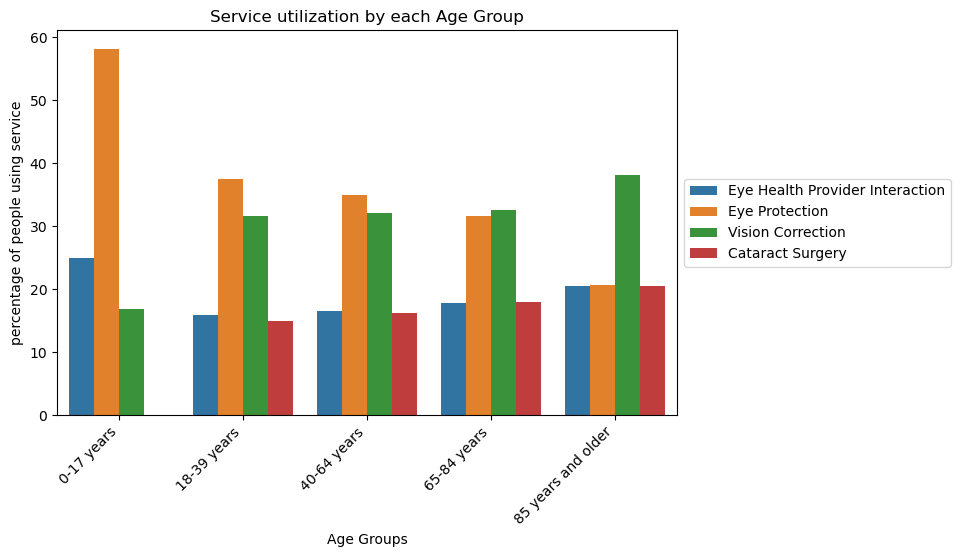

In [22]:
services_age_data = service_utilization_data[[ 'Age', 'Category', 'Sample_Size']]\
                    .groupby(['Age', 'Category'])['Sample_Size'].sum().groupby(level=0).\
                    apply(lambda x: (x / x.sum()) * 100).reset_index()
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data = services_age_data, x = "Age", y = "Sample_Size", hue = "Category", ax = ax)
plt.title('Service utilization by each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('percentage of people using service')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

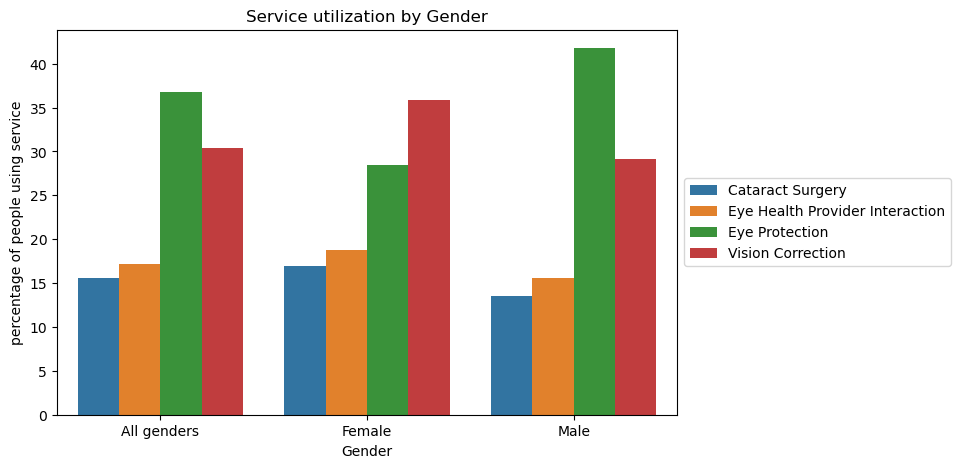

In [23]:
services_gender_data = service_utilization_data[[ 'Gender', 'Category', 'Sample_Size']]\
                    .groupby(['Gender', 'Category'])['Sample_Size'].sum().groupby(level=0).\
                    apply(lambda x: (x / x.sum()) * 100).reset_index()

%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data = services_gender_data, x = "Gender", y = "Sample_Size", hue = "Category", ax = ax)
plt.title('Service utilization by Gender')
plt.xlabel('Gender')
plt.ylabel('percentage of people using service')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

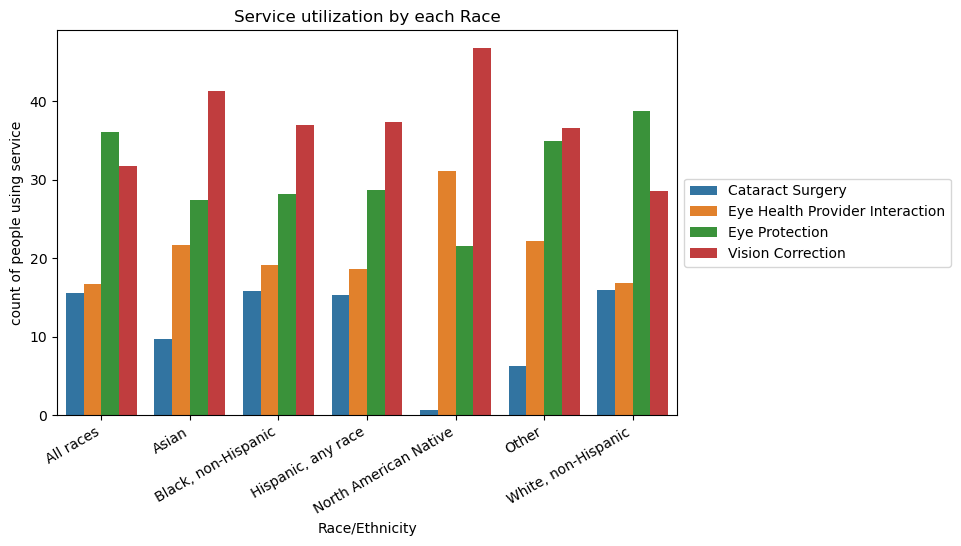

In [24]:
services_race_data = service_utilization_data[[ 'RaceEthnicity', 'Category', 'Sample_Size']]\
                    .groupby(['RaceEthnicity', 'Category'])['Sample_Size'].sum().groupby(level=0).\
                    apply(lambda x: (x / x.sum()) * 100).reset_index()
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data = services_race_data, x = "RaceEthnicity", y = "Sample_Size", hue = "Category", ax = ax)
plt.title('Service utilization by each Race')
plt.xlabel('Race/Ethnicity')
plt.ylabel('count of people using service')
plt.xticks(rotation = 30, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

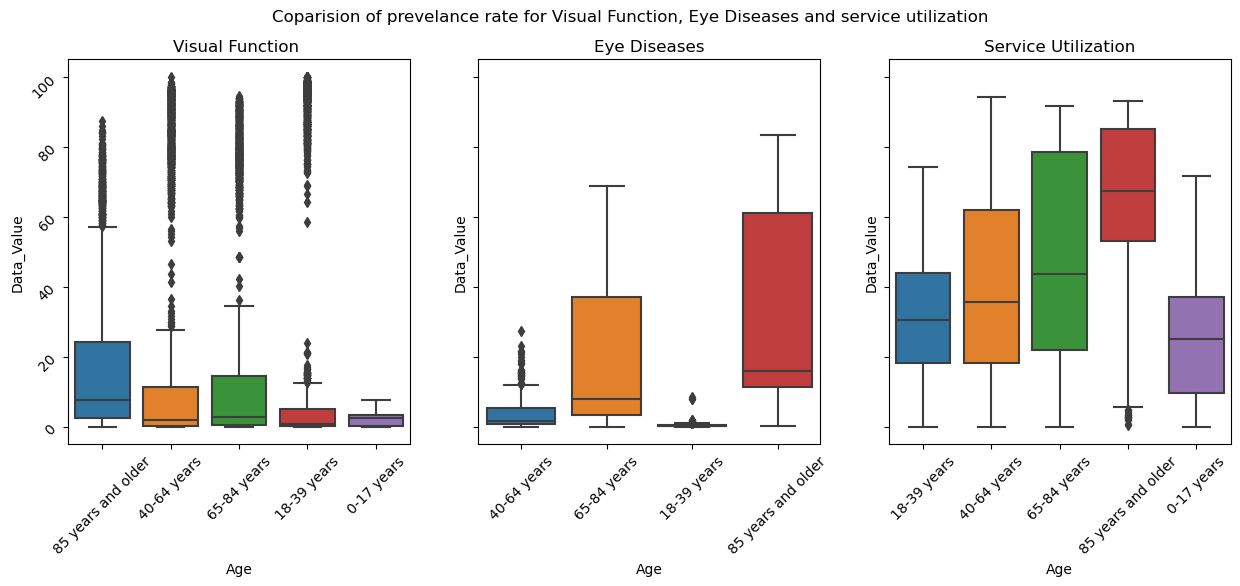

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Coparision of prevelance rate for Visual Function, Eye Diseases and service utilization')


sns.boxplot(data = visual_function_data, x = 'Age', y = 'Data_Value', ax=axes[0])
axes[0].set_title('Visual Function ')
axes[0].tick_params(labelrotation=45)

sns.boxplot(eye_health_condition_data,x = 'Age', y = 'Data_Value', ax=axes[1])
axes[1].set_title('Eye Diseases')
axes[1].tick_params(labelrotation=45)

sns.boxplot(service_utilization_data, x = 'Age', y = 'Data_Value', ax=axes[2])
axes[2].set_title('Service Utilization')
axes[2].tick_params(labelrotation=45)
plt.show()


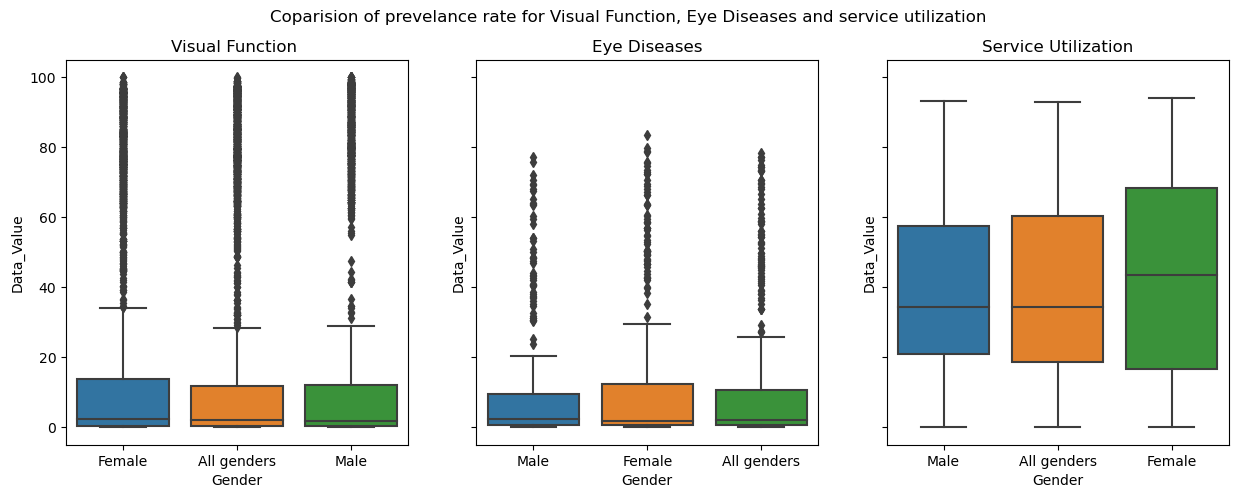

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Coparision of prevelance rate for Visual Function, Eye Diseases and service utilization')


sns.boxplot(data = visual_function_data, x = 'Gender', y = 'Data_Value', ax=axes[0])
axes[0].set_title('Visual Function ')

sns.boxplot(eye_health_condition_data,x = 'Gender', y = 'Data_Value', ax=axes[1])
axes[1].set_title('Eye Diseases')

sns.boxplot(service_utilization_data, x = 'Gender', y = 'Data_Value', ax=axes[2])
axes[2].set_title('Service Utilization')
plt.show()

### Predictive analysis

In [27]:
data.shape

(23263, 30)

In [28]:
data.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,LocationID,TopicID,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID
0,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Some of the time,18-39 years,...,59,TUTL,CPROT,ISPROT,RSOMT,AGE1839,GM,ASN,RFDM,RFNO
1,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Always,18-39 years,...,59,TUTL,CPROT,ISPROT,RALW,AGE1839,GM,ASN,RFDM,RFNO


In [29]:
final_data = data[['QuestionID', 'ResponseID', 'AgeID', 'GenderID', 'RaceEthnicityID', \
                 'RiskFactorID', 'RiskFactorResponseID', 'Data_Value' ]]

In [30]:
final_data.head()

,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,Data_Value
0,ISPROT,RSOMT,AGE1839,GM,ASN,RFDM,RFNO,16.63
1,ISPROT,RALW,AGE1839,GM,ASN,RFDM,RFNO,18.75
2,ISBLA,RYES,AGE85PLUS,GF,ALLRACE,RFHT,RFYES,2.08
3,ISFS5,RRF,AGE4064,GF,WHT,RFDM,RFNO,0.05
4,ISFS5,RVD,AGE4064,GF,ALLRACE,RFDM,RFNO,0.38


In [31]:
categorical_columns = final_data.select_dtypes(include = object).columns
le = LabelEncoder()
categorical_dict = {}
for column in categorical_columns:
    final_data[column] = le.fit_transform(final_data[column])
    le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
    categorical_dict[column] = le_name_mapping

In [32]:
final_data.head()

,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,Data_Value
0,18,13,1,2,2,1,4,16.63
1,18,0,1,2,2,1,4,18.75
2,1,17,4,1,1,2,6,2.08
3,11,11,2,1,6,1,4,0.05
4,11,16,2,1,1,1,4,0.38


In [33]:
features_data = final_data.drop(columns = ['Data_Value'])
target_data = final_data['Data_Value']
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data , test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_test = y_test.to_numpy()

(16284, 7) (16284,)
(6979, 7) (6979,)


In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted_lr = regression_model.predict(X_test)\

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('mean squared error :', mean_squared_error(y_test,y_predicted_lr,))
print('root mean squared error:', mean_squared_error(y_test,y_predicted_lr, squared = False))
print('mean absolute error:', mean_absolute_error(y_test,y_predicted_lr))
# print('Test data model performance score', regression_model.score(X_test, y_test))

Slope: [ 0.64358368  0.48605461  2.2431299   0.57221928 -0.03476079  0.63867031
  0.36632673]
Intercept: 0.1411826016829849
mean squared error : 886.0852868628787
root mean squared error: 29.767184731896947
mean absolute error: 23.401916839048486


In [35]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_predicted_rf = rf_regressor.predict(X_test)

print('mean squared error :', mean_squared_error(y_test,y_predicted_rf,))
print('root mean squared error:', mean_squared_error(y_test,y_predicted_rf, squared = False))
print('mean absolute error:', mean_absolute_error(y_test,y_predicted_rf))

# print('Test data model performance score', rf_regressor.score(X_test, y_predicted_rf))


mean squared error : 5.28135623032238
root mean squared error: 2.298120151411231
mean absolute error: 1.1056653136336452


In [36]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(rf_regressor, X_test, y_test,
                           cv=KFold(n_splits=5, shuffle=True))


array([0.99076072, 0.98975576, 0.98980707, 0.99053733, 0.99237498])

In [37]:
abs_error_values = abs(y_test - y_predicted_rf)
max(abs_error_values)

28.888299999999923

In [38]:
rf_feature_importance_dict = dict(zip(features_data.columns, rf_regressor.feature_importances_))
rf_feature_importance_dict

{'QuestionID': 0.18326290489740704,
 'ResponseID': 0.7560925848463805,
 'AgeID': 0.04394977823603942,
 'GenderID': 0.0046131307539711746,
 'RaceEthnicityID': 0.00688939509401267,
 'RiskFactorID': 0.001035580646271342,
 'RiskFactorResponseID': 0.004156625525917867}

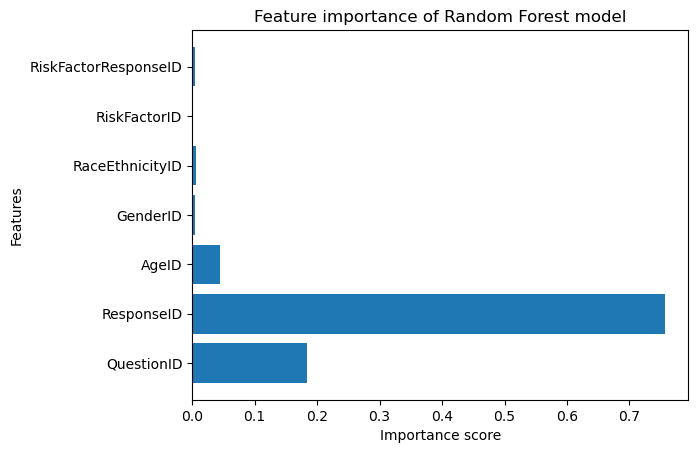

In [39]:
plt.barh(features_data.columns, rf_regressor.feature_importances_)
plt.title('Feature importance of Random Forest model')
plt.ylabel('Features')
plt.xlabel('Importance score')
plt.show()

In [40]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train,y_train)
y_predicted_xgb = xgb_regressor.predict(X_test)

print('mean squared error :',mean_squared_error(y_test,y_predicted_xgb,))
print('root mean squared error:',mean_squared_error(y_test,y_predicted_xgb, squared = False))
print('mean absolute error:',mean_absolute_error(y_test,y_predicted_xgb))
# print('Test data model performance score', xgb_regressor.score(X_test, y_predicted_xgb))

mean squared error : 5.363886721375795
root mean squared error: 2.316006632411875
mean absolute error: 1.3278261284594377


In [41]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(xgb_regressor, X_test, y_test,
                           cv=KFold(n_splits=5, shuffle=True))


array([0.99047294, 0.99033988, 0.99206513, 0.98991832, 0.99193354])

In [42]:
abs_error_values = abs(y_test - y_predicted_xgb)
max(abs_error_values)

22.875336456298825

In [43]:
xgb_feature_importance_dict = dict(zip(features_data.columns, xgb_regressor.feature_importances_))
xgb_feature_importance_dict

{'QuestionID': 0.13670866,
 'ResponseID': 0.80508626,
 'AgeID': 0.045166265,
 'GenderID': 0.0045648054,
 'RaceEthnicityID': 0.00365305,
 'RiskFactorID': 0.0014099076,
 'RiskFactorResponseID': 0.0034110406}

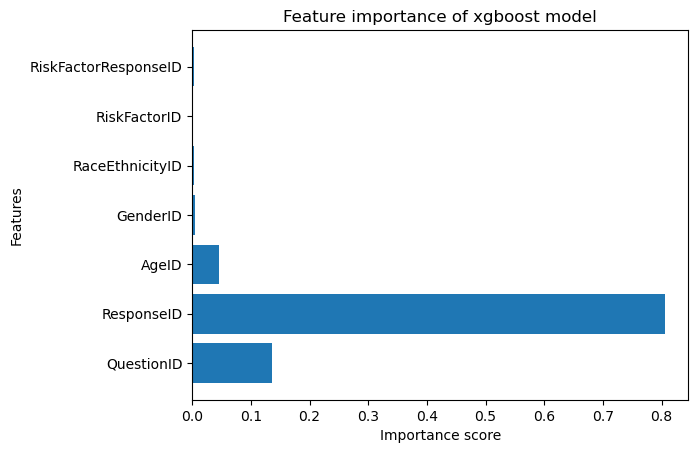

In [44]:
plt.barh(features_data.columns, xgb_regressor.feature_importances_)
plt.title('Feature importance of xgboost model')
plt.ylabel('Features')
plt.xlabel('Importance score')
plt.show()

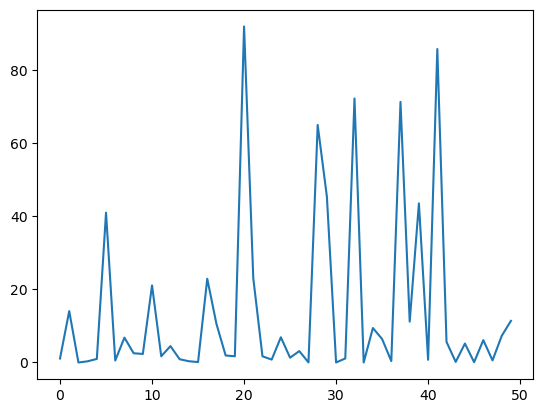

In [45]:
plt.plot(y_test[:50])

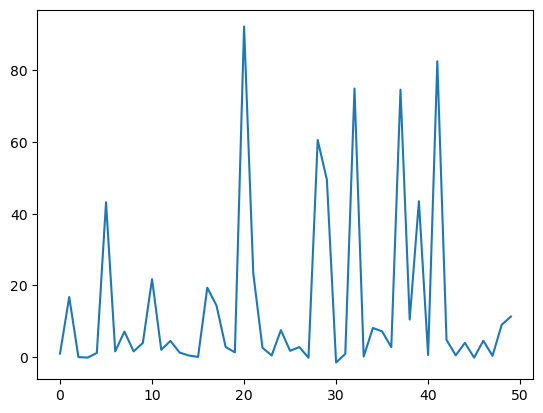

In [46]:
plt.plot(y_predicted_xgb[:50])

### Investigation of data points with high Absolute Error

In [47]:
# investigate cases in which are causing high errors
# check the rows where the error rate greater than threshold
# find why those data points have such error rate

In [48]:
max_error_row_indexes_rf = []
y_predicted_rf_list = []
error_value_rf_list = []
for i in range(len(y_test)):
    if abs(y_test[i] - y_predicted_rf[i]) > 10:
        max_error_row_indexes_rf.append(X_test.iloc[[i]].index[0])
        y_predicted_rf_list.append(y_predicted_rf[i])
        error_value_rf_list.append(abs(y_test[i] - y_predicted_rf[i]))

In [49]:
len(max_error_row_indexes_rf)

60

In [50]:
max_abs_error_rf_data = data.iloc[max_error_row_indexes_rf]
max_abs_error_rf_data['predicted_data_value'] = y_predicted_rf_list
max_abs_error_rf_data['error_value'] = error_value_rf_list
max_abs_error_rf_data.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,predicted_data_value,error_value
2884,2014,2015,US,National,NHIS,Visual Function,Blind or Difficulty Seeing,"Percentage of people who have (no, some, a lot...",No difficulty,40-64 years,...,CBLIND,ISDGL2,RND,AGE4064,GF,BLK,RFDM,RFYES,67.710800,14.510800
3352,2014,2015,US,National,NHIS,Visual Function,Blind or Difficulty Seeing,Percentage of adults who have trouble seeing e...,Yes,85 years and older,...,CBLIND,ISDGL1,RYES,AGE85PLUS,GM,ALLRACE,RFDM,RFYES,23.646833,12.853167


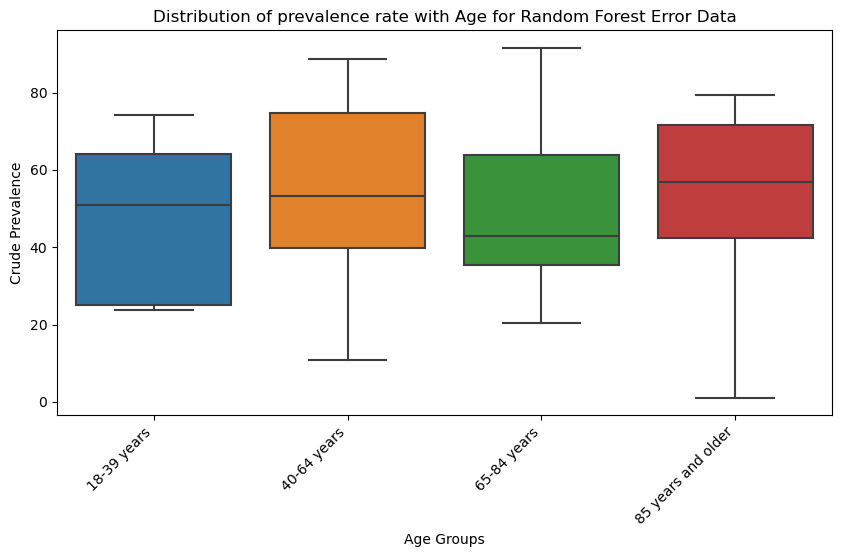

In [51]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = max_abs_error_rf_data.sort_values(by = "Age"), x = "Age", y = "Data_Value", ax=ax)
plt.title('Distribution of prevalence rate with Age for Random Forest Error Data')
plt.xlabel('Age Groups')
plt.ylabel('Crude Prevalence')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

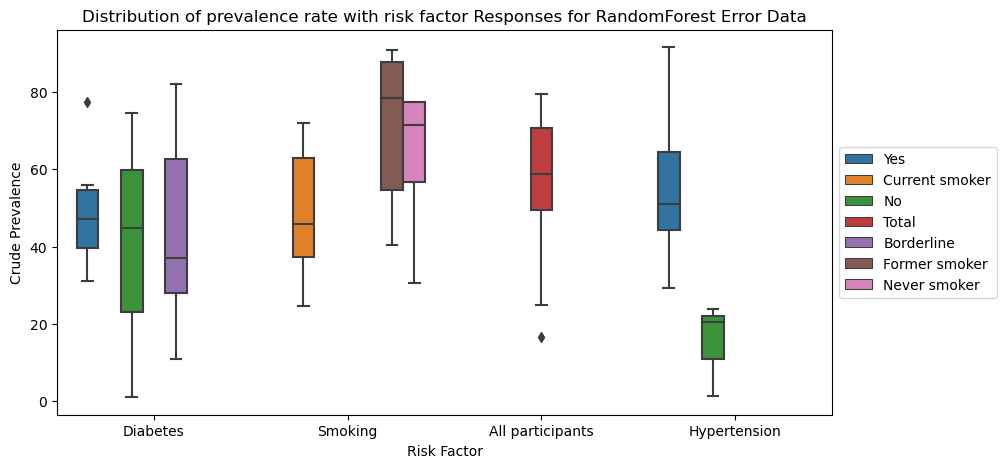

In [52]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = max_abs_error_rf_data, x = "RiskFactor", y="Data_Value", hue = "RiskFactorResponse", ax = ax)
plt.title('Distribution of prevalence rate with risk factor Responses for RandomForest Error Data')
plt.xlabel('Risk Factor')
plt.ylabel('Crude Prevalence')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [53]:
# pd.set_option('display.max_colwidth', None)
max_abs_error_rf_data[[ 'Question', 'QuestionID']].drop_duplicates().reset_index(drop = True)

,Question,QuestionID
0,"Percentage of people who have (no, some, a lot...",ISDGL2
1,Percentage of adults who have trouble seeing e...,ISDGL1
2,Percentage of adults who participate in sports...,ISRISK
3,Percentage of adults who even when wearing gla...,ISFS4
4,Percentage of adults who currently wear eyegla...,ISGLA
5,Percentage of adults who are blind or unable t...,ISBLA
6,Percentage of adults ever told by a doctor or ...,ISCAT
7,Percentage of people who wear glasses (NHIS Fu...,ISGL
8,Percentage of adults who even when wearing gla...,ISNS1
9,Percentage of adults who in the past 12 months...,ISPROV


In [54]:
max_abs_error_rf_data[[ 'QuestionID']].value_counts()

QuestionID
ISDGL2        9
ISGLA         8
ISCAT         7
ISDGL1        7
ISGL          7
ISPROV        6
ISBLA         3
ISFS5         2
ISNS1         2
ISPROT        2
ISRISK        2
QCATS         2
ISFS2         1
ISFS3         1
ISFS4         1
dtype: int64

In [55]:
max_abs_error_rf_data[['QuestionID','Response', 'Age','Data_Value', 'predicted_data_value', 'error_value']].sort_values(by = ['QuestionID'])

,QuestionID,Response,Age,Data_Value,predicted_data_value,error_value
346,ISBLA,Yes,85 years and older,16.70,4.642200,12.057800
8714,ISBLA,Yes,85 years and older,1.06,14.343250,13.283250
8698,ISBLA,Yes,85 years and older,1.44,11.587200,10.147200
6836,ISCAT,Yes,65-84 years,20.39,31.258300,10.868300
6187,ISCAT,Yes,85 years and older,49.43,70.934200,21.504200
4545,ISCAT,Yes,85 years and older,58.82,69.616900,10.796900
4475,ISCAT,Yes,65-84 years,55.99,45.616600,10.373400
7495,ISCAT,Yes,65-84 years,68.70,51.371200,17.328800
5460,ISCAT,Yes,65-84 years,23.97,39.284100,15.314100
6002,ISCAT,Yes,85 years and older,58.86,68.864300,10.004300


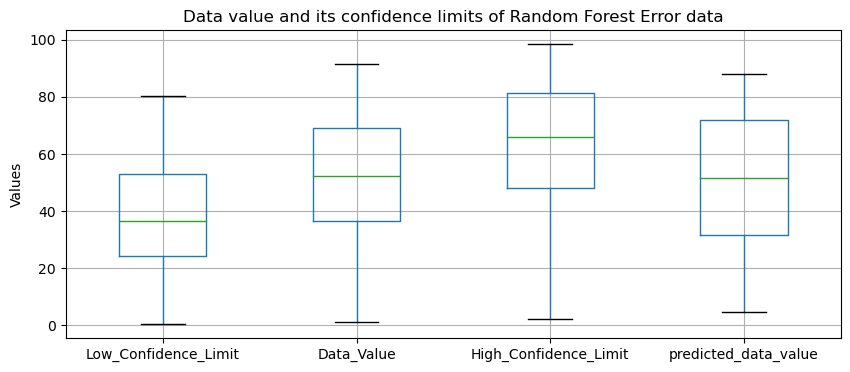

In [56]:
plt.figure(figsize=(10,4))
max_abs_error_rf_data[['Low_Confidence_Limit', 'Data_Value', 'High_Confidence_Limit', 'predicted_data_value']].boxplot()
plt.title('Data value and its confidence limits of Random Forest Error data')
plt.ylabel('Values')
plt.show()

In [57]:
max_error_row_indexes_xgb = []
y_predicted_xgb_list = []
error_value_xgb_list = []
for i in range(len(y_test)):
    if abs(y_test[i] - y_predicted_xgb[i]) > 10:
        max_error_row_indexes_xgb.append(X_test.iloc[[i]].index[0])
        y_predicted_xgb_list.append(y_predicted_xgb[i])
        error_value_xgb_list.append(abs(y_test[i] - y_predicted_xgb[i]))

In [58]:
len(max_error_row_indexes_xgb)

49

In [59]:
max_abs_error_xgb_data = data.iloc[max_error_row_indexes_xgb]
max_abs_error_xgb_data['predicted_data_value'] = y_predicted_xgb_list
max_abs_error_xgb_data['error_value'] = error_value_xgb_list
max_abs_error_xgb_data.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,predicted_data_value,error_value
22979,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing gla...,Not at all difficult,85 years and older,...,CFIELD,ISNS2,RNOTD,AGE85PLUS,GALL,ALLRACE,RFDM,RFBD,83.866417,14.736417
2884,2014,2015,US,National,NHIS,Visual Function,Blind or Difficulty Seeing,"Percentage of people who have (no, some, a lot...",No difficulty,40-64 years,...,CBLIND,ISDGL2,RND,AGE4064,GF,BLK,RFDM,RFYES,67.070381,13.870381


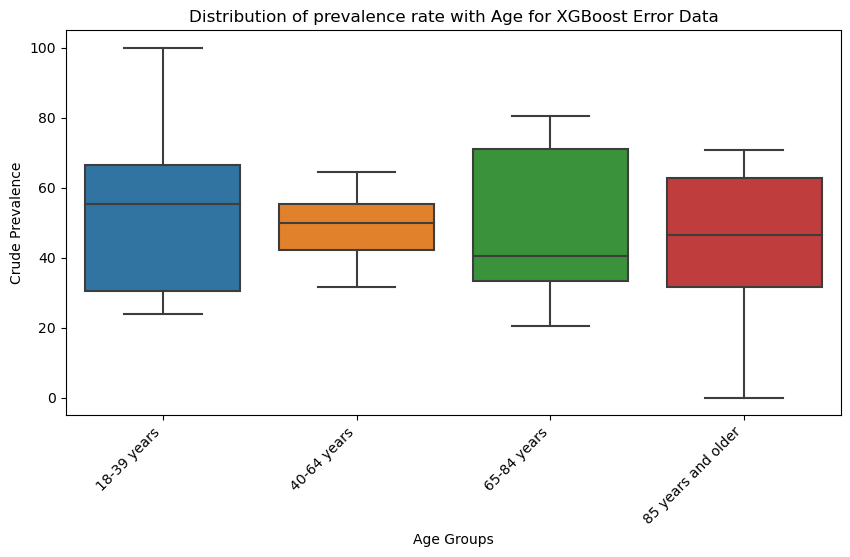

In [60]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = max_abs_error_xgb_data.sort_values(by = "Age"), x = "Age", y = "Data_Value", ax=ax)
plt.title('Distribution of prevalence rate with Age for XGBoost Error Data')
plt.xlabel('Age Groups')
plt.ylabel('Crude Prevalence')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

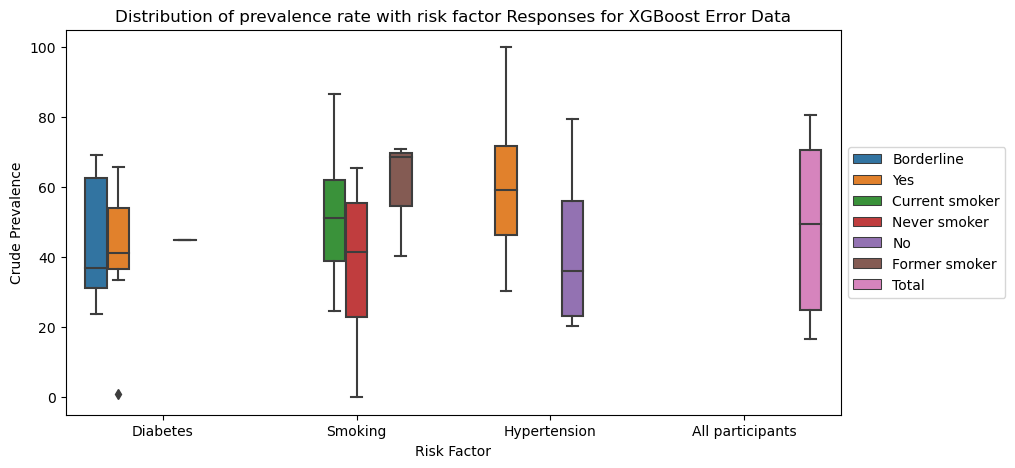

In [61]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = max_abs_error_xgb_data, x = "RiskFactor", y="Data_Value", hue = "RiskFactorResponse", ax = ax)
plt.title('Distribution of prevalence rate with risk factor Responses for XGBoost Error Data')
plt.xlabel('Risk Factor')
plt.ylabel('Crude Prevalence')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [62]:
max_abs_error_xgb_data[[ 'Question','QuestionID']].drop_duplicates().reset_index(drop = True)

,Question,QuestionID
0,Percentage of adults who even when wearing gla...,ISNS2
1,"Percentage of people who have (no, some, a lot...",ISDGL2
2,Percentage of adults who have trouble seeing e...,ISDGL1
3,Percentage of people with diagnosed cataract w...,QCATS
4,Percentage of adults who participate in sports...,ISRISK
5,Percentage of adults who currently wear eyegla...,ISGLA
6,Percentage of adults who even when wearing gla...,ISNS1
7,Percentage of adults who even when wearing gla...,ISFS5
8,Proportion of adults who participate in activi...,ISPROT
9,Percentage of adults who are blind or unable t...,ISBLA


In [63]:
# max_abs_error_xgb_data[['Question','Response', 'Age','Data_Value', 'predicted_data_value', 'error_value']].sort_values(by = ['Question'])

In [64]:
# max_abs_error_rf_data.to_csv('max_abs_error_rf_data.csv')
# max_abs_error_xgb_data.to_csv('max_abs_error_xgb_data.csv')

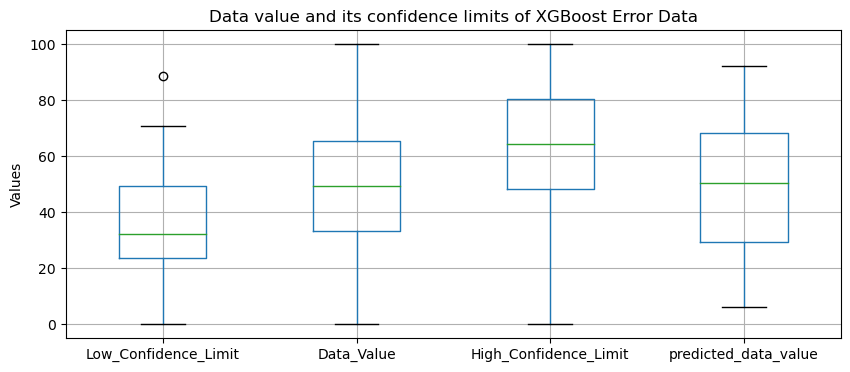

In [65]:
plt.figure(figsize=(10,4))
max_abs_error_xgb_data[['Low_Confidence_Limit', 'Data_Value', 'High_Confidence_Limit', 'predicted_data_value']].boxplot()
plt.title('Data value and its confidence limits of XGBoost Error Data')
plt.ylabel('Values')
plt.show()

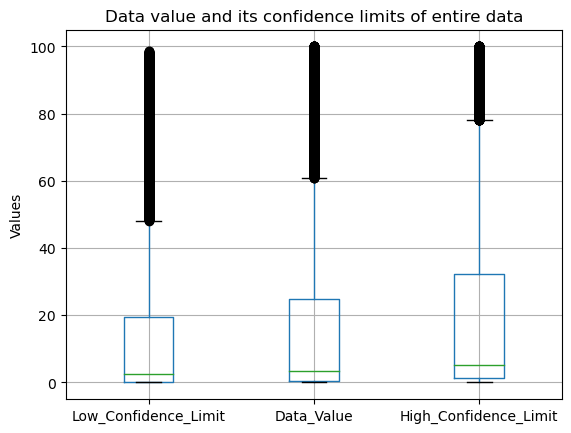

In [66]:
data[['Low_Confidence_Limit', 'Data_Value', 'High_Confidence_Limit']].boxplot()
plt.title('Data value and its confidence limits of entire data')
plt.ylabel('Values')
plt.show()

In [67]:
for i in range(len(max_abs_error_xgb_data.index)):
    if max_abs_error_rf_data.index[i] == max_abs_error_xgb_data.index[i]:
        print(max_abs_error_rf_data.index[i])